In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load bostod housing dataset

In [2]:
from sklearn.datasets import load_boston
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
dataset = pd.DataFrame(data=load_boston()['data'], columns=load_boston()['feature_names'])
X = dataset.values
y = load_boston()['target']

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
feature_type_mapping = {
    'CRIM': 'continuous',
    'ZN': 'continuous',
    'INDUS': 'continuous',
    'CHAS': 'discrete',
    'NOX': 'continuous',
    'RM': 'continuous',
    'AGE': 'continuous',
    'DIS': 'continuous',
    'RAD': 'discrete',
    'TAX': 'continuous',
    'PTRATIO': 'continuous',
    'B': 'continuous',
    'LSTAT': 'continuous'
}

Create regression model

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_leaf=10)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# PDP plots

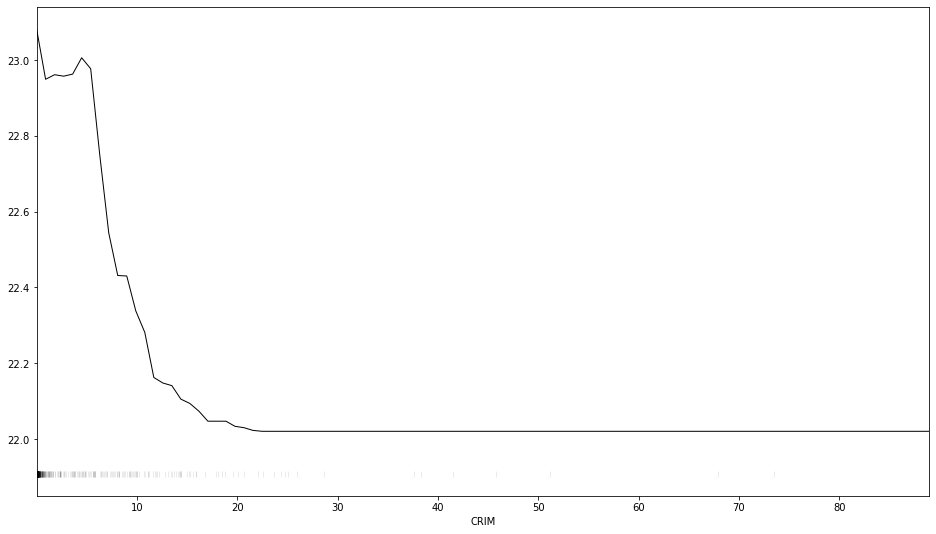

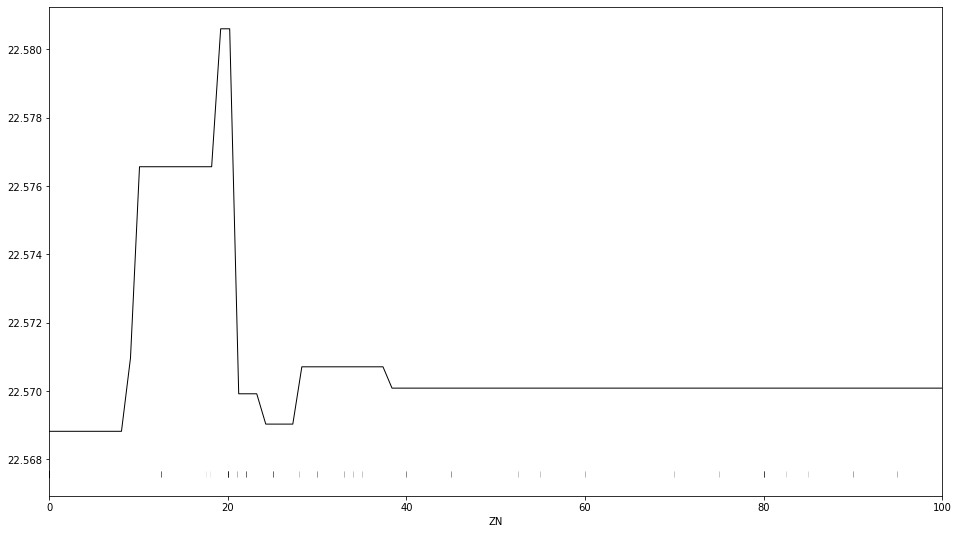

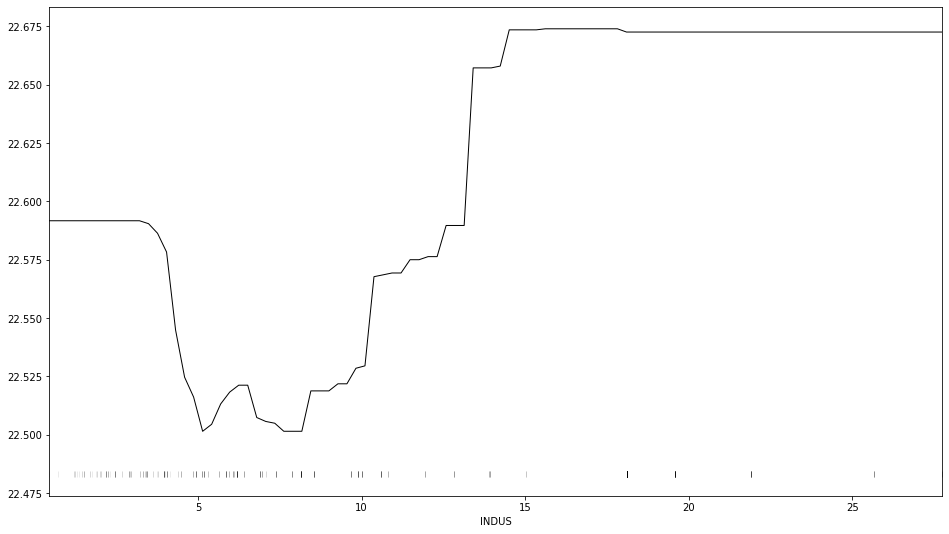

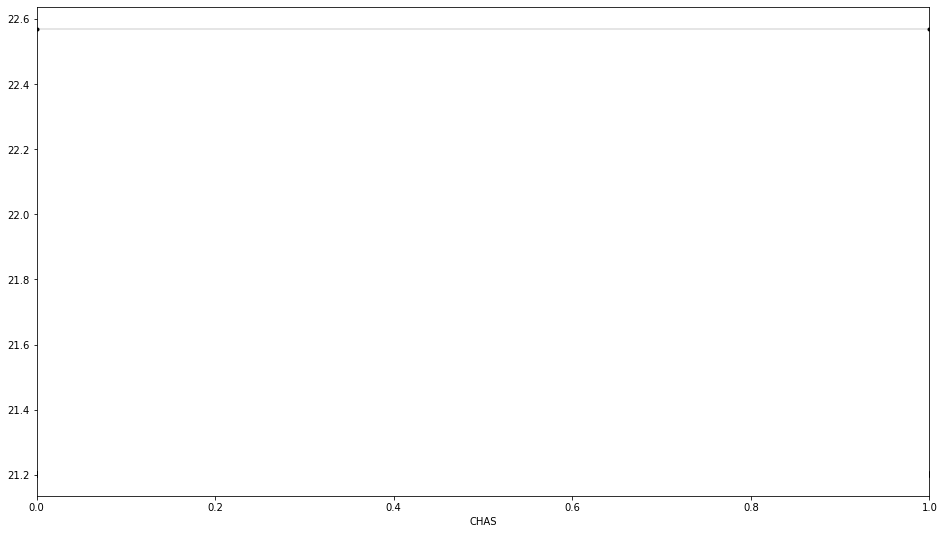

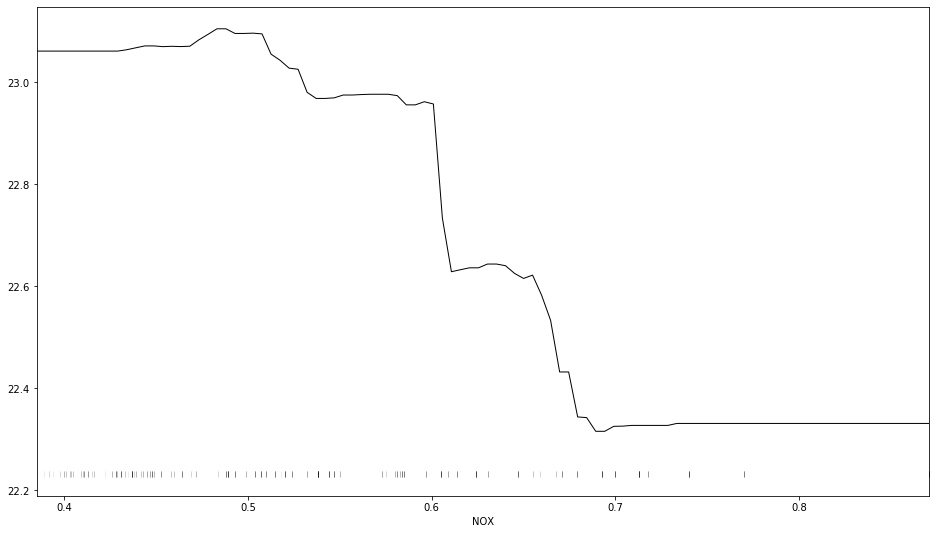

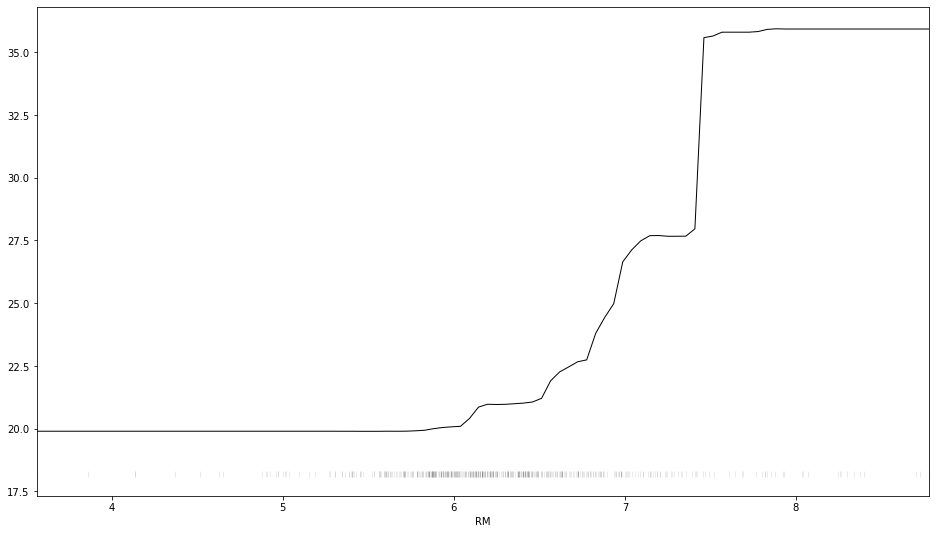

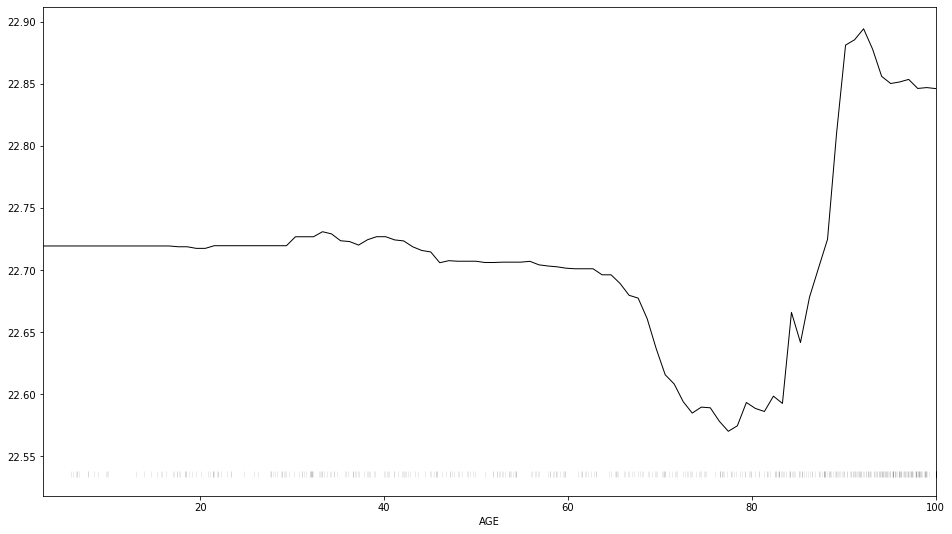

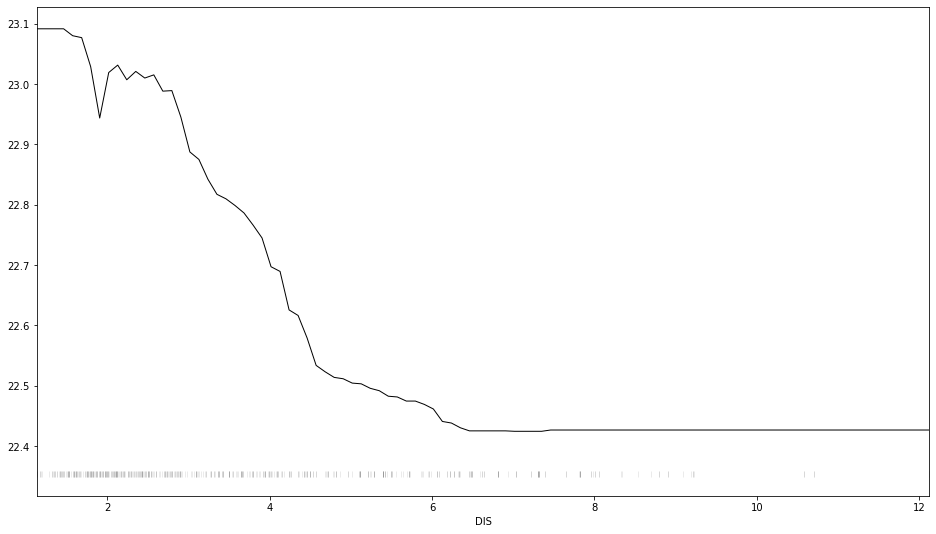

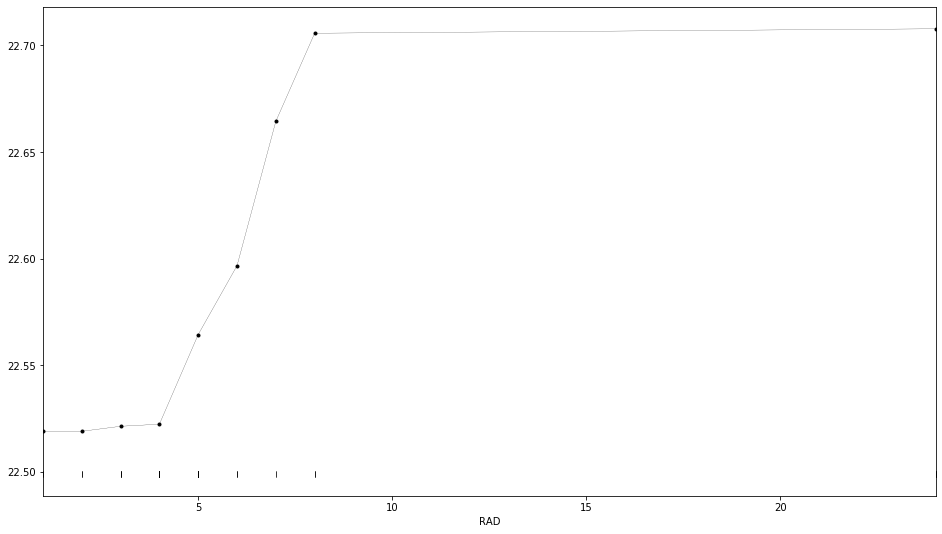

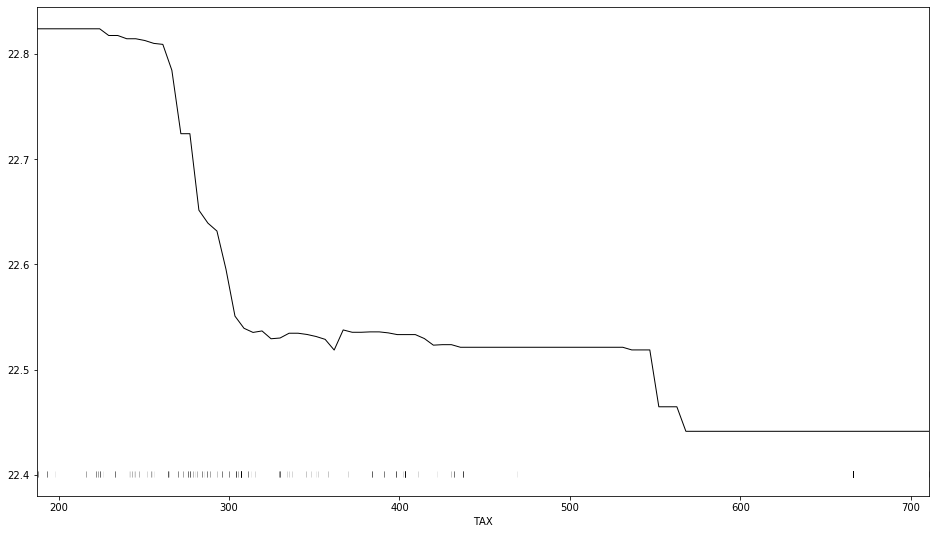

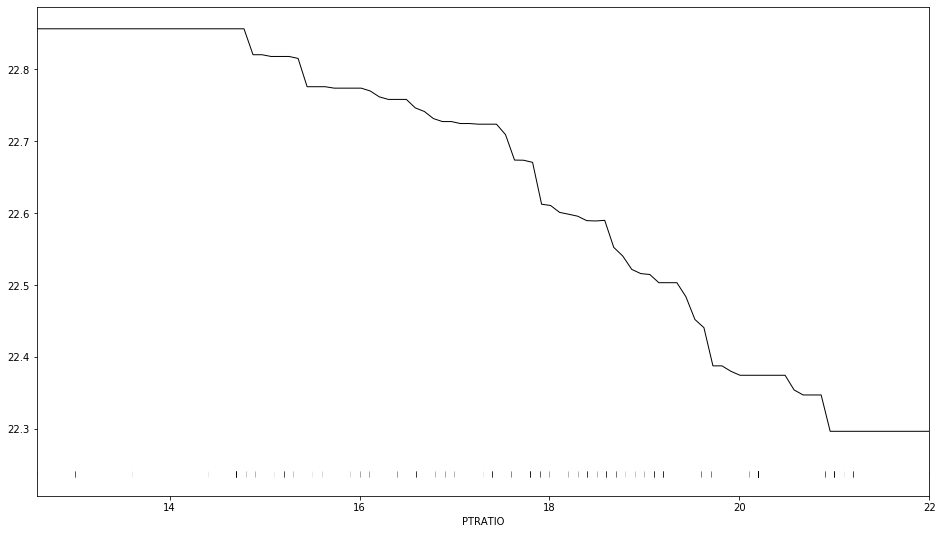

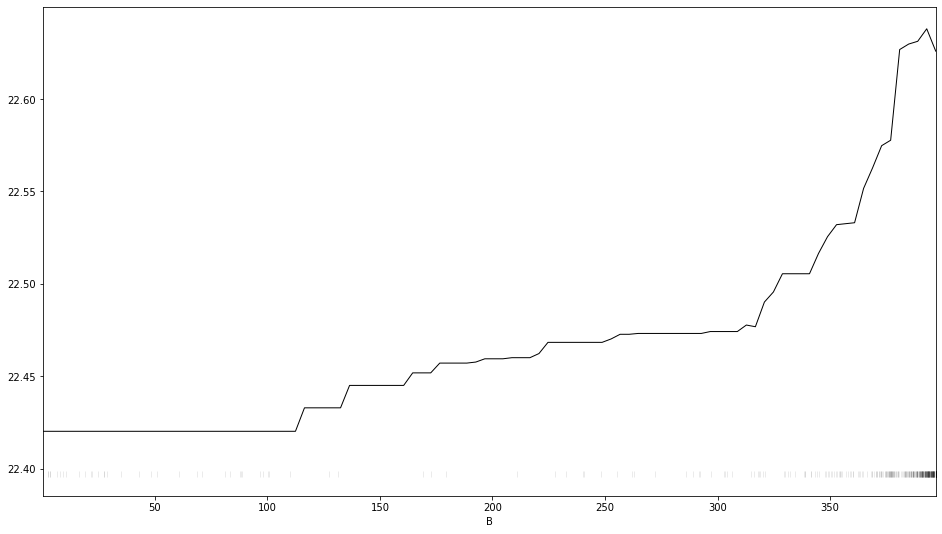

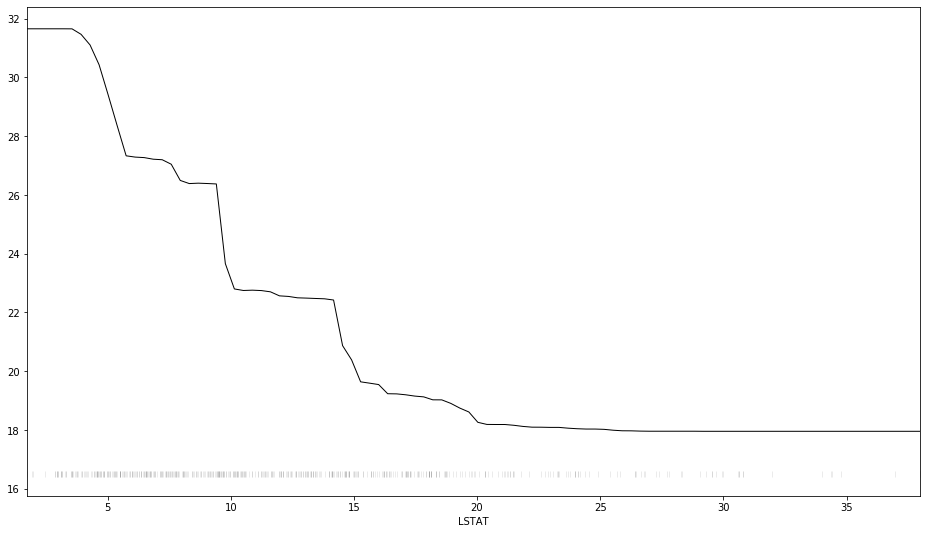

In [7]:
from partial_dependence_plot import plot_pdp

for f, feature_name in enumerate(dataset.columns):
    
#     feature_type = 'continuous'
    feature_type = feature_type_mapping[feature_name]
    pdp_df = plot_pdp(model=model,
                      X=X, 
                      feature_name=feature_name,
                      feature_number=f, 
                      feature_type=feature_type)
    
    if feature_type == 'discrete':
        pdp_df.plot(figsize=(16, 9), 
                    legend=False, 
                    marker='o', 
                    linewidth=0.2, 
                    markersize=3, 
                    color='black')
        
    elif feature_type == 'continuous':
        pdp_df.plot(figsize=(16, 9), 
                    legend=False, 
                    linewidth=1, 
                    color='black')
    ax = plt.gca()
    bottom, top = ax.get_ylim()
    indicator_height = 0.05 * (top - bottom)
    ax.plot(dataset[feature_name].values, 
            [bottom - indicator_height]*dataset.shape[0], 
            '|', 
            color='k', 
            alpha=0.08)

# ICE plots

In [7]:
from partial_dependence_plot import ice_one_sample

hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6
hej6


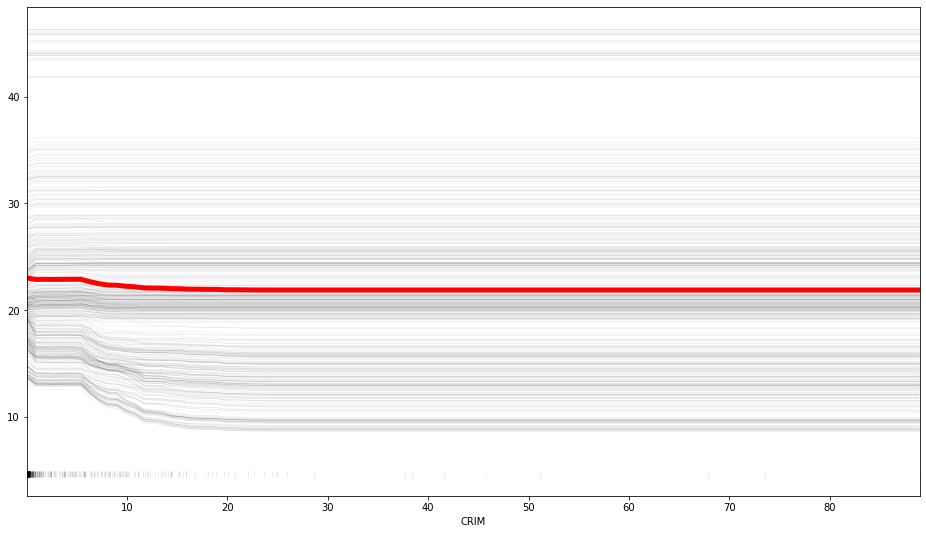

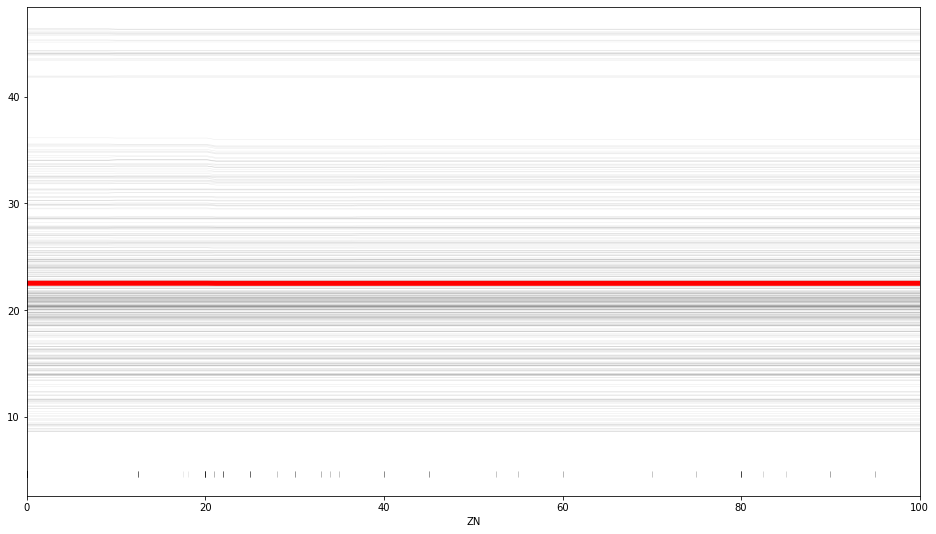

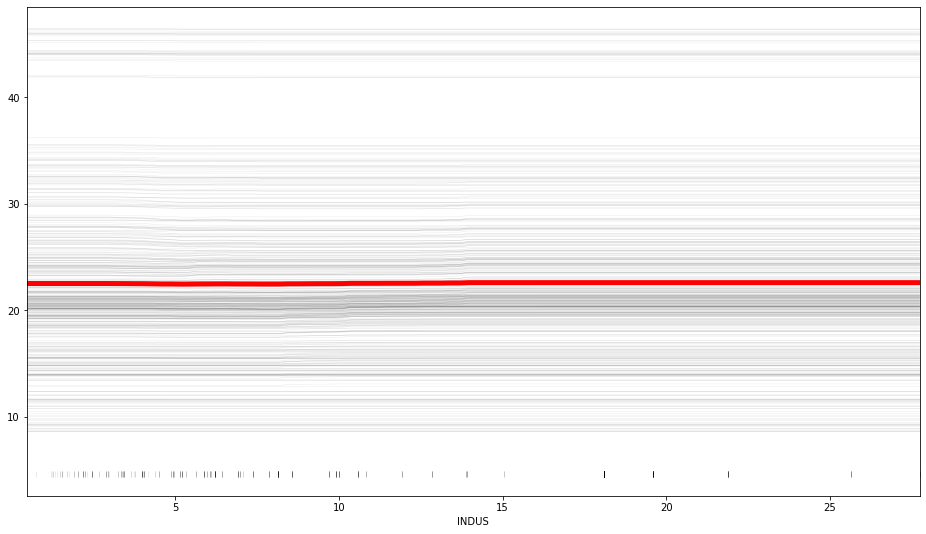

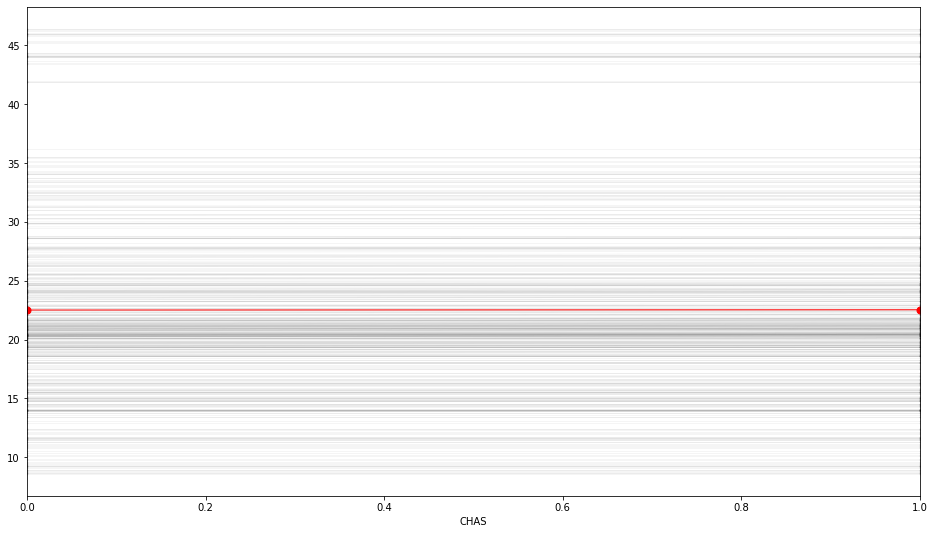

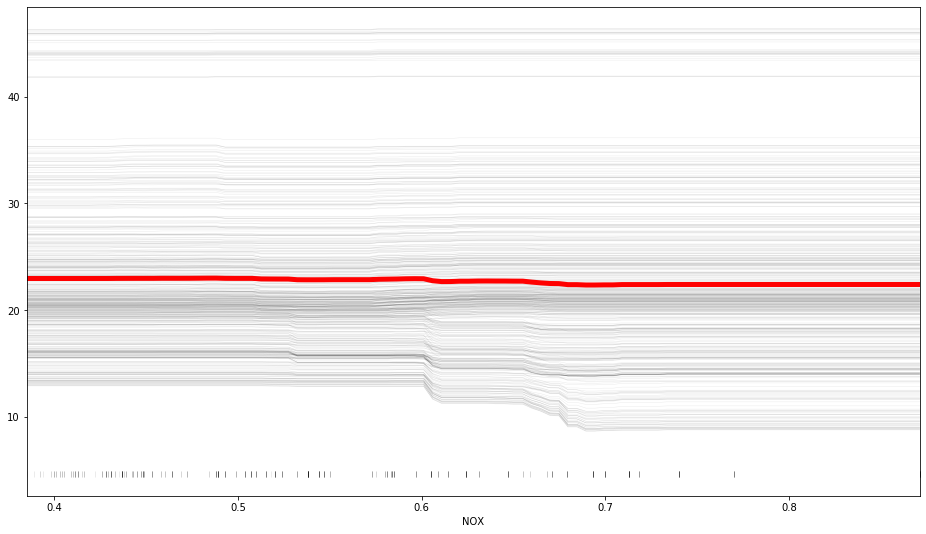

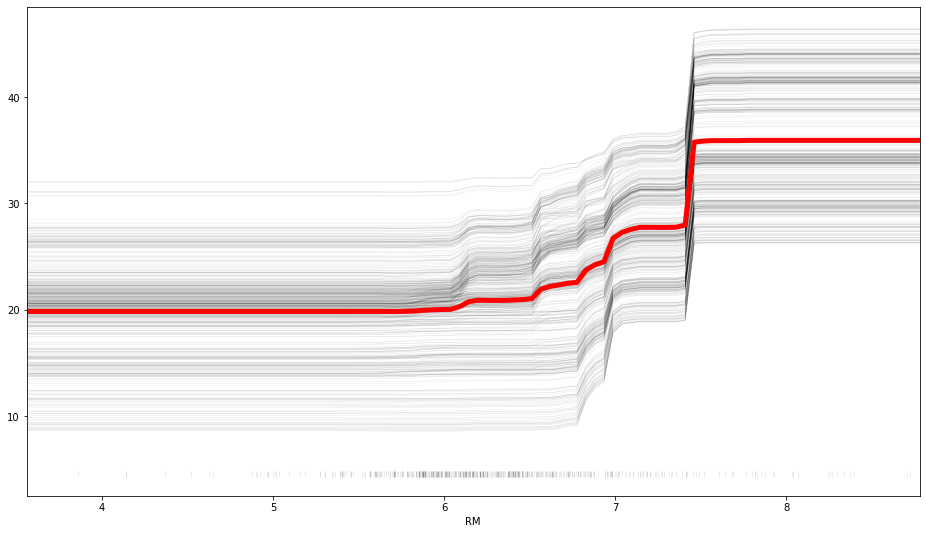

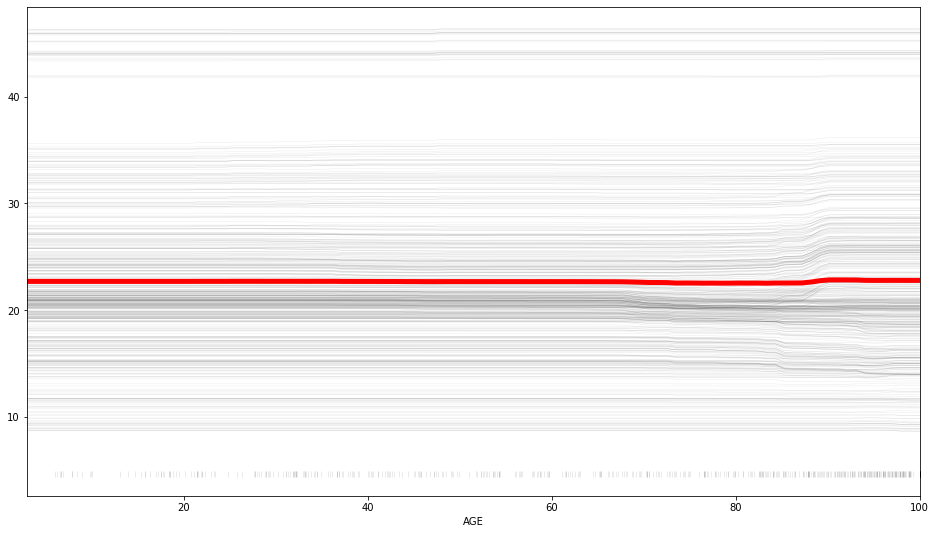

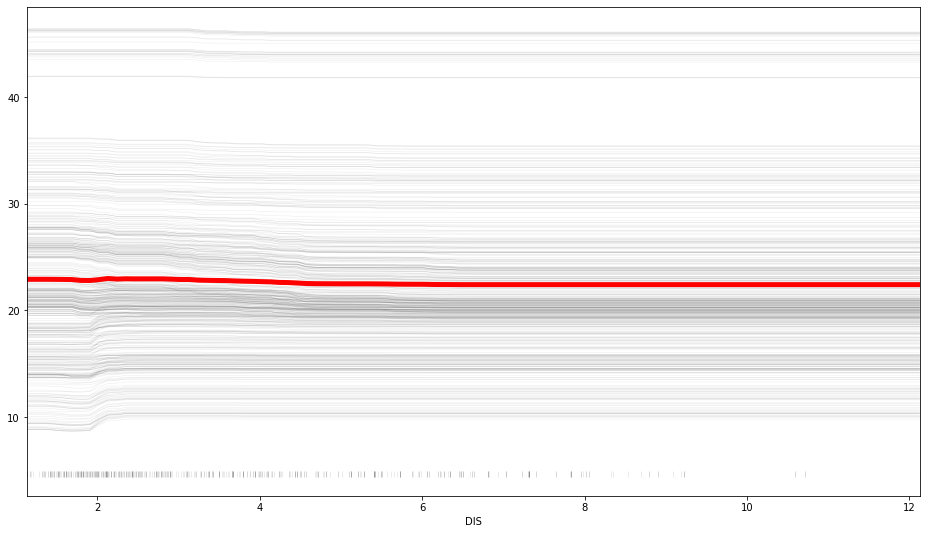

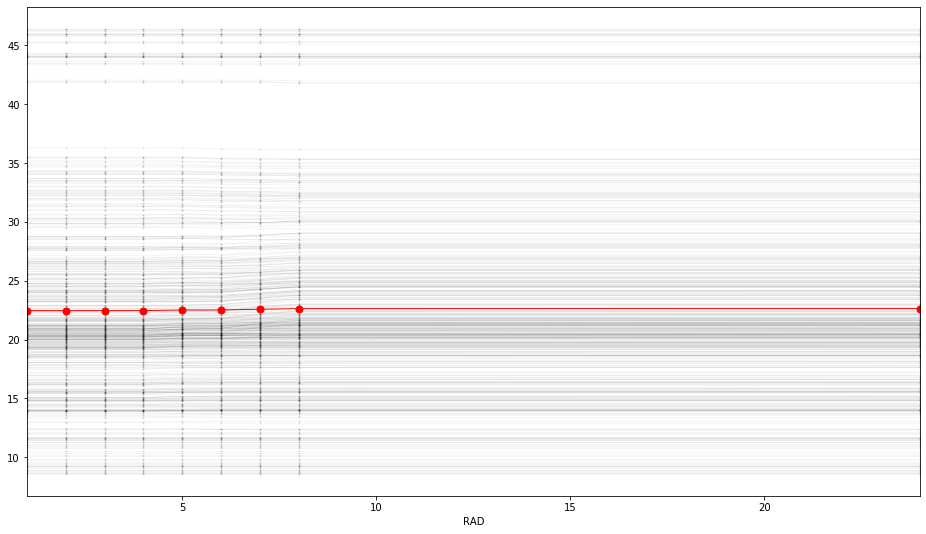

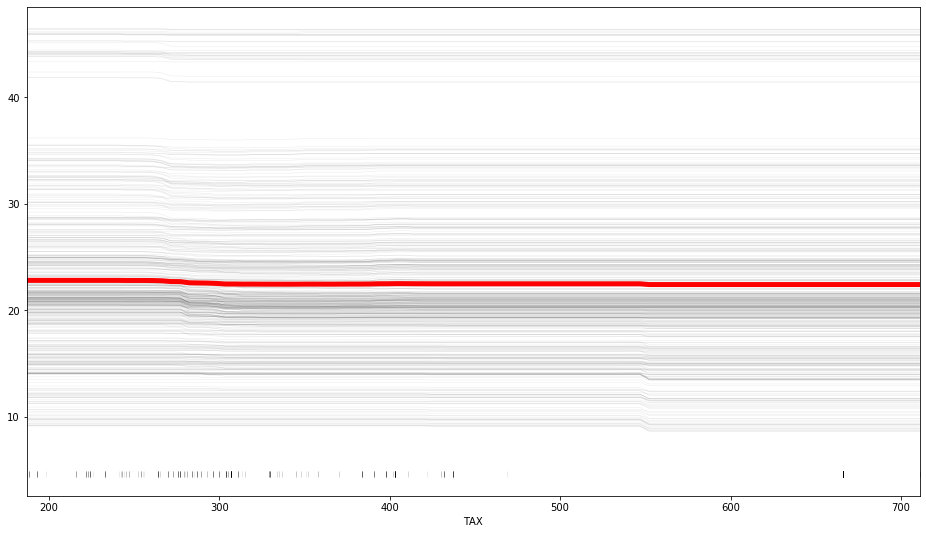

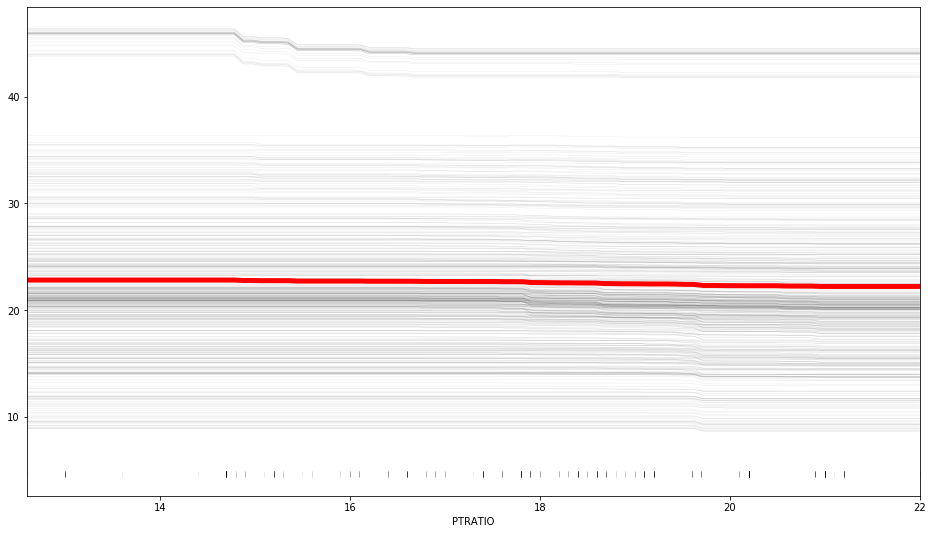

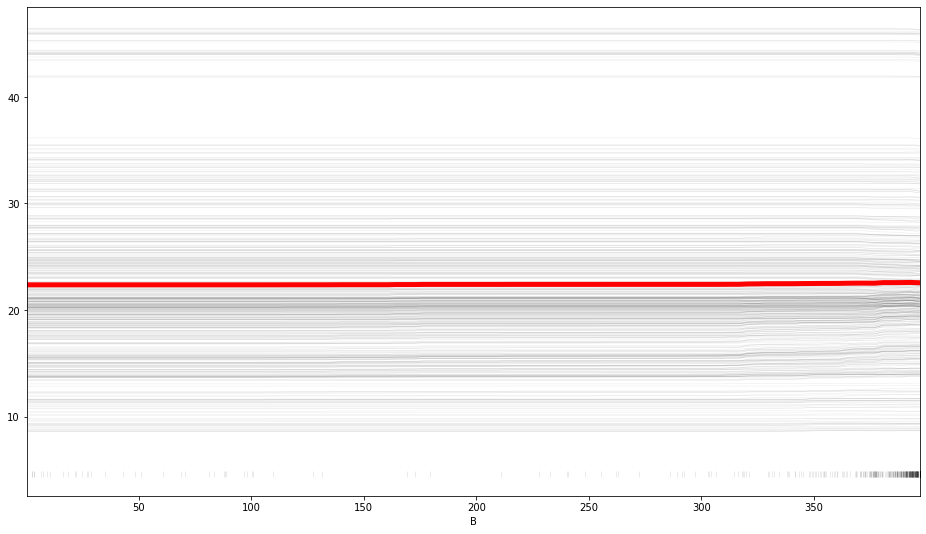

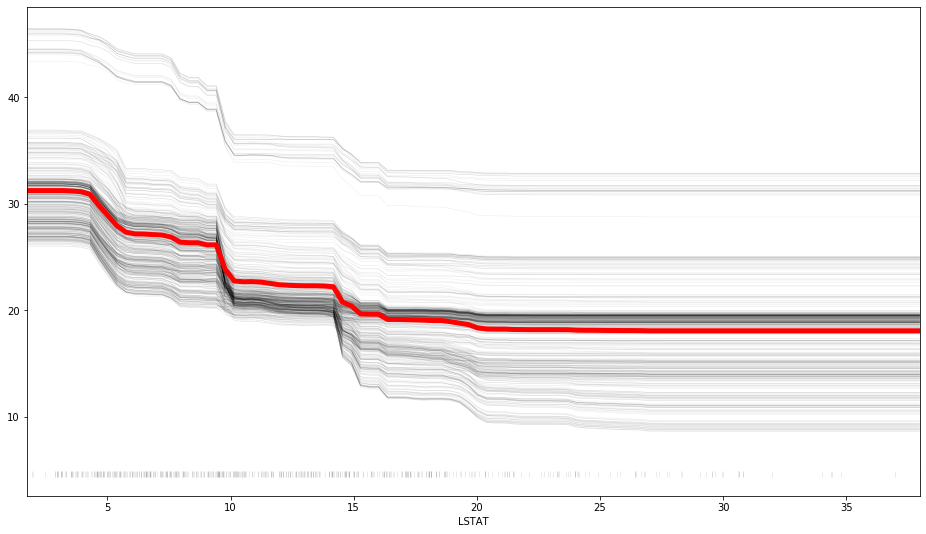

In [7]:
from partial_dependence_plot import plot_ice

for f, feature_name in enumerate(dataset.columns):
    
    feature_type = feature_type_mapping[feature_name]
    ice_df = plot_ice(model=model,
                      X=X, 
                      feature_number=f, 
                      feature_name=feature_name, 
                      feature_type=feature_type)
    
    if feature_type == 'discrete':
        ax = ice_df.plot(figsize=(16, 9), 
                         legend=False, 
                         marker='o', 
                         linewidth=0.5, 
                         markersize=1, 
                         color='black', 
                         alpha=0.08)
        ice_df.mean(axis=1).plot(c='red', 
                                 linewidth=1, 
                                 legend=False, 
                                 ax=ax, 
                                 marker='o', 
                                 markersize=7)
        
    elif feature_type == 'continuous':
        ax = ice_df.plot(figsize=(16, 9), 
                         c='k', 
                         alpha=0.08, 
                         legend=False, 
                         linewidth=0.5)
        ice_df.mean(axis=1).plot(c='red', 
                                 linewidth=5, 
                                 legend=False, 
                                 ax=ax)

        bottom, top = ax.get_ylim()
        indicator_height = 0.05 * (top - bottom)
        ax.plot(dataset[feature_name].values, 
                [bottom - indicator_height] * dataset.shape[0], 
                '|', 
                color='k',
                alpha=0.08)

# 2D PDP plots

In [9]:
from partial_dependence_plot import plot_pdp_2d

pdp_map = plot_pdp_2d(model=model,
                      X=X, 
                      feature_names=['first', 'second'],
                      feature_numbers=[5, 12], 
                      feature_types=['continuous', 'continuous'])

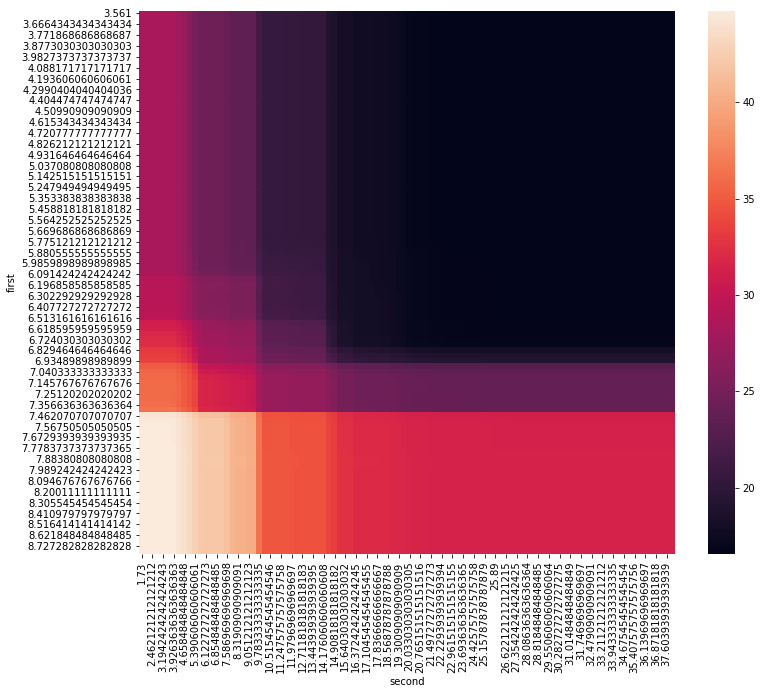

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(pdp_map, annot=False)

# Permutation importance

In [11]:
def mean_absolute_error(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

In [12]:
from permutation_importance import permutation_importance_one_feature

err = permutation_importance_one_feature(model=model,
                                   X=X, 
                                   y=y,
                                   feature_number=5,
                                   error_func=mean_absolute_error)

[========================================================================] 100%


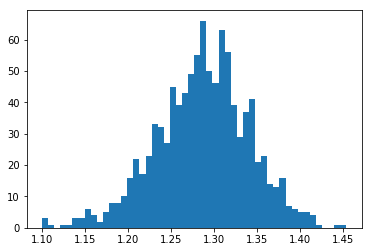

In [13]:
ax = plt.hist(err, bins=50)

In [14]:
from permutation_importance import permutation_importance

ref_df = permutation_importance(model=model,
                                X=X, 
                                y=y,
                                feature_names=dataset.columns,
                                error_func=mean_absolute_error)
ref_df = ref_df.reindex(ref_df.mean().sort_values(ascending=True).index, axis=1)

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[=======================================

In [15]:
ref_df.head()

,CHAS,ZN,RAD,INDUS,B,TAX,PTRATIO,AGE,DIS,NOX,CRIM,RM,LSTAT
0,0.000291,0.001378,0.014632,0.013067,0.018716,0.032400,0.046374,0.056091,0.108183,0.153705,0.159449,1.260311,1.826201
1,0.000491,0.001435,0.012617,0.014017,0.031149,0.028363,0.043430,0.056683,0.107338,0.133008,0.149126,1.368231,1.835691
2,0.000412,0.000655,0.009952,0.014196,0.019007,0.036993,0.043886,0.064762,0.118325,0.130482,0.162136,1.198773,1.965449
3,0.000248,0.001178,0.009294,0.014885,0.027162,0.033852,0.048758,0.065594,0.119016,0.150696,0.158211,1.273287,1.937179
4,0.000392,0.001543,0.012884,0.014887,0.021965,0.037026,0.046411,0.064103,0.109787,0.132465,0.159696,1.221846,1.732479


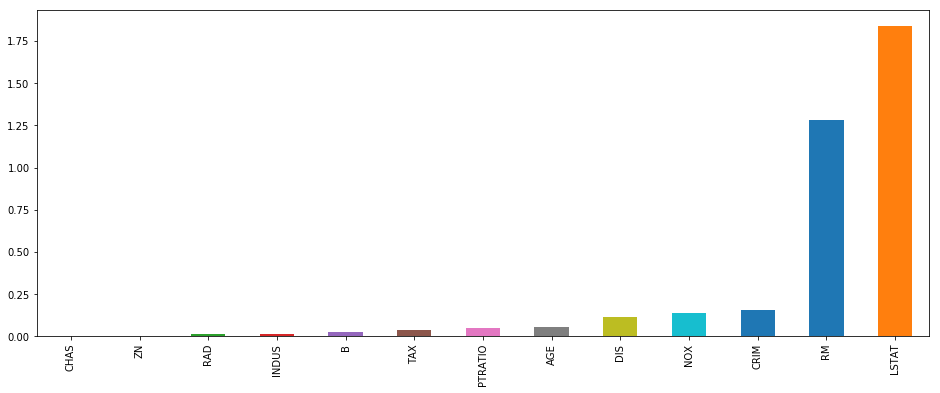

In [16]:
ref_df.mean().plot.bar(figsize=(16, 6))

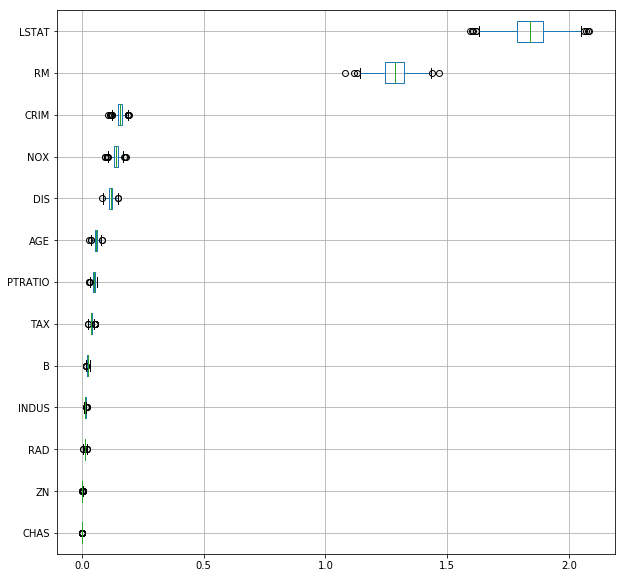

In [17]:
ref_df.boxplot(vert=False, figsize=(10, 10))

## ALE plots

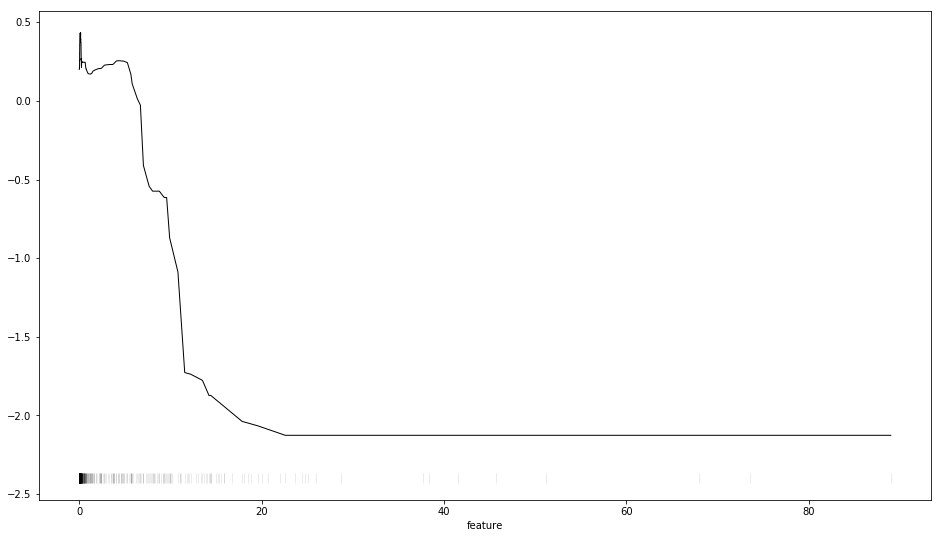

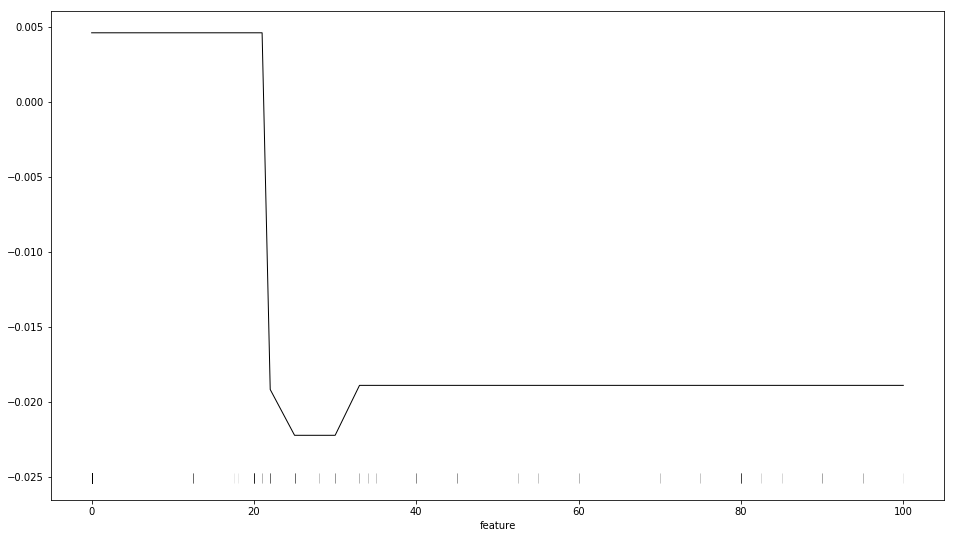

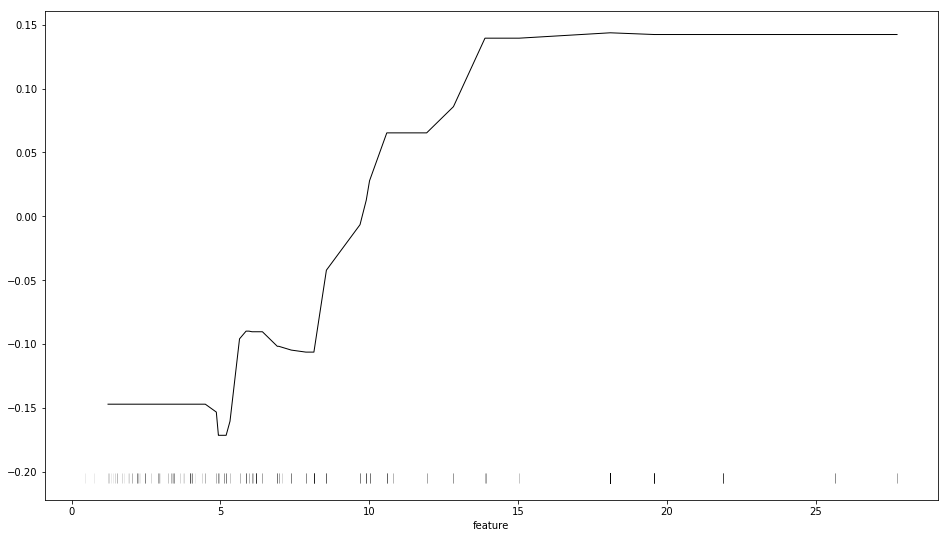

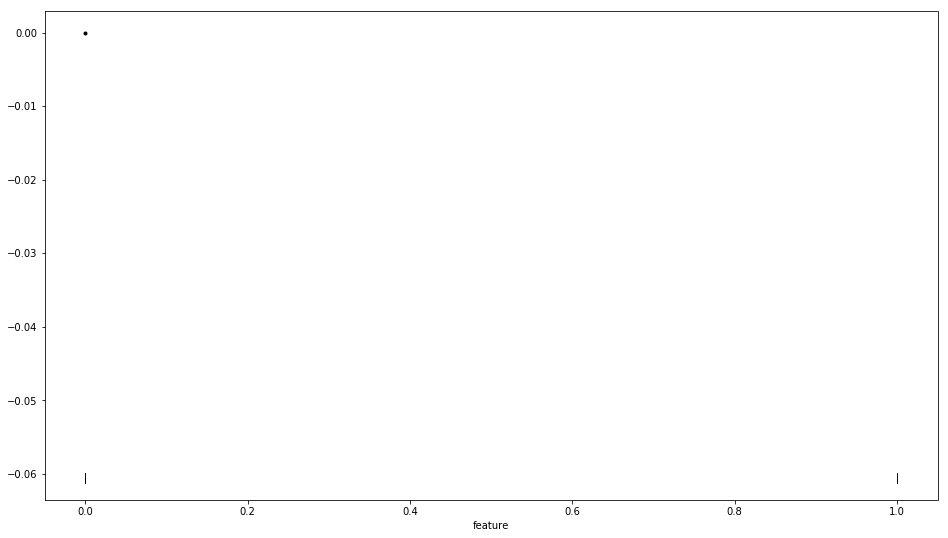

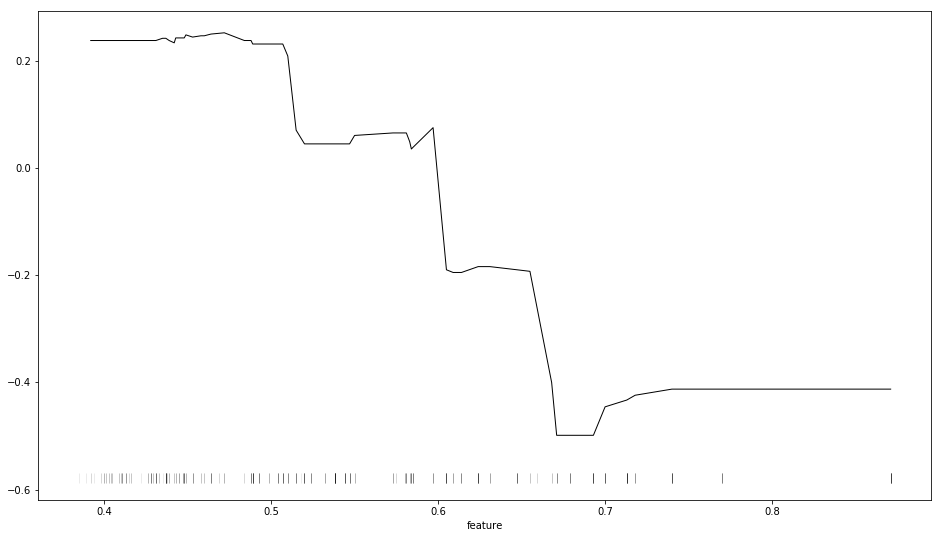

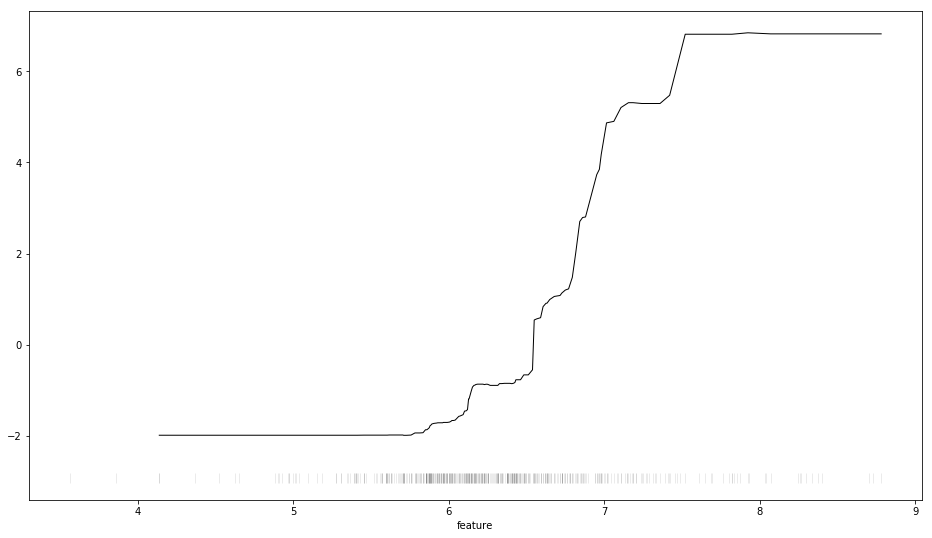

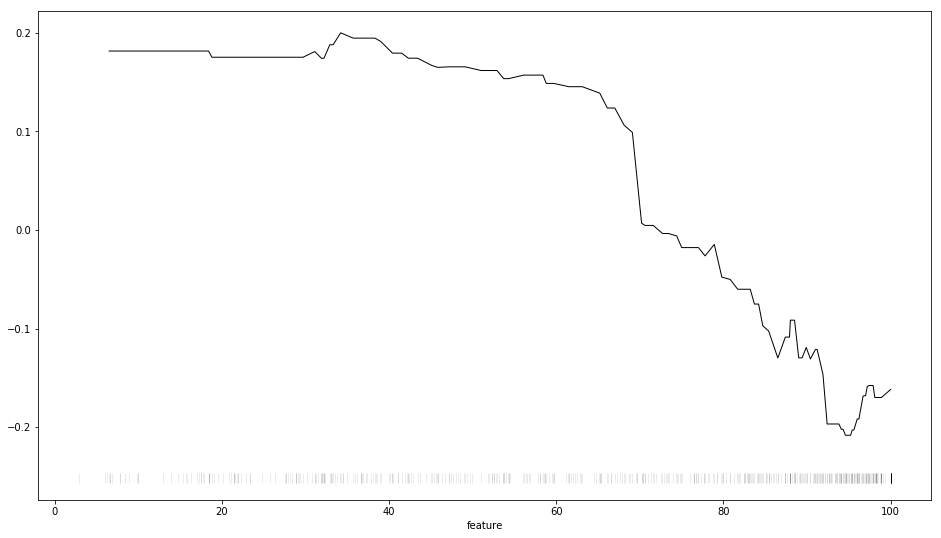

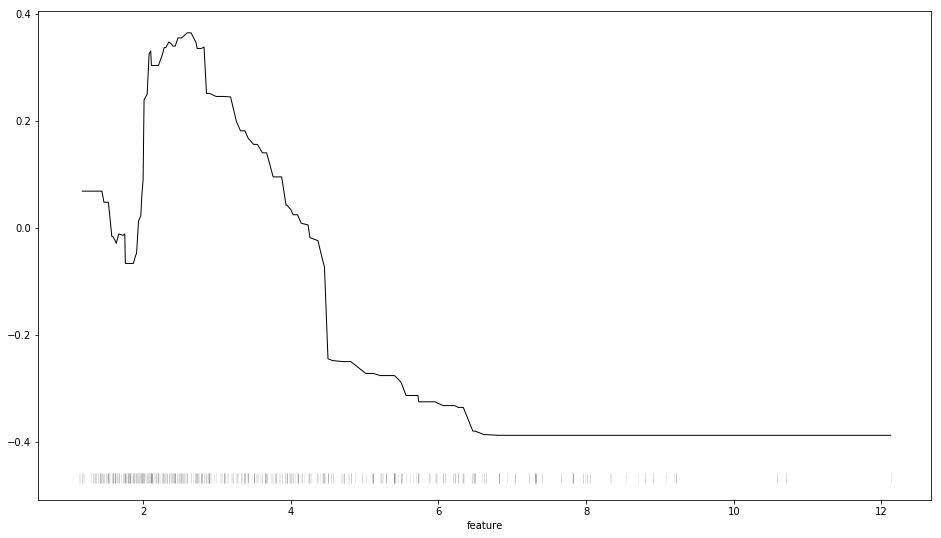

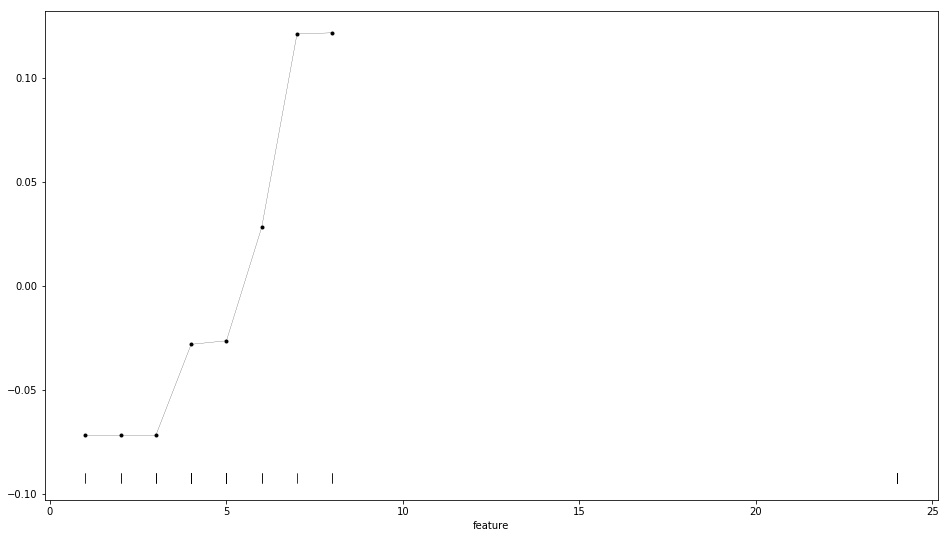

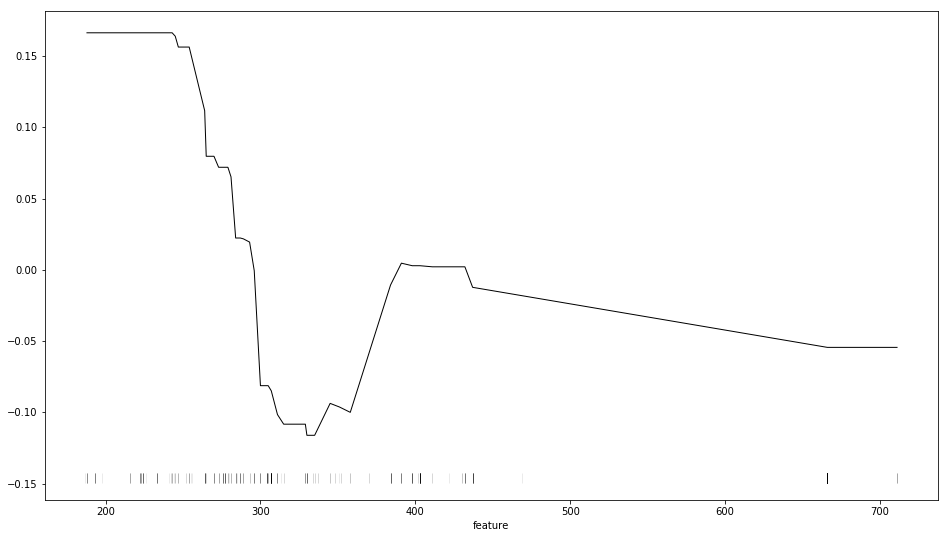

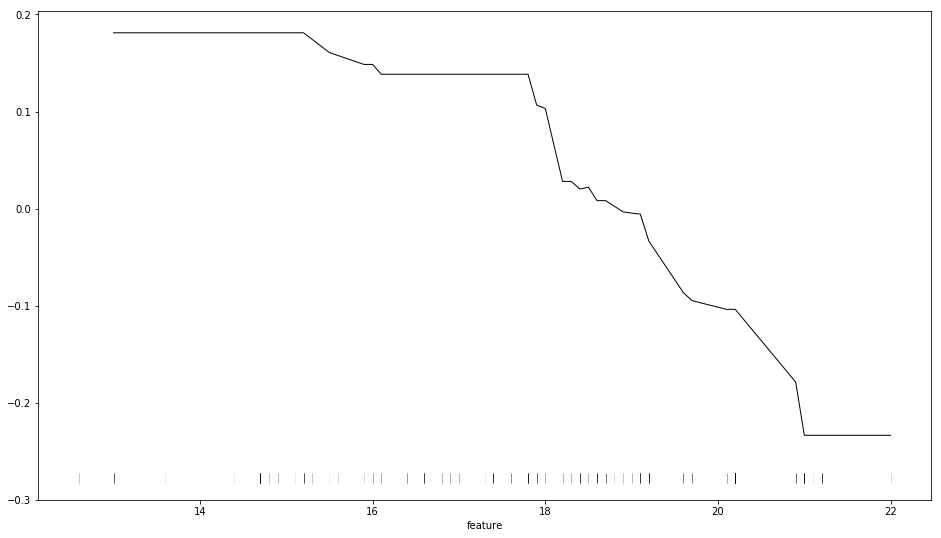

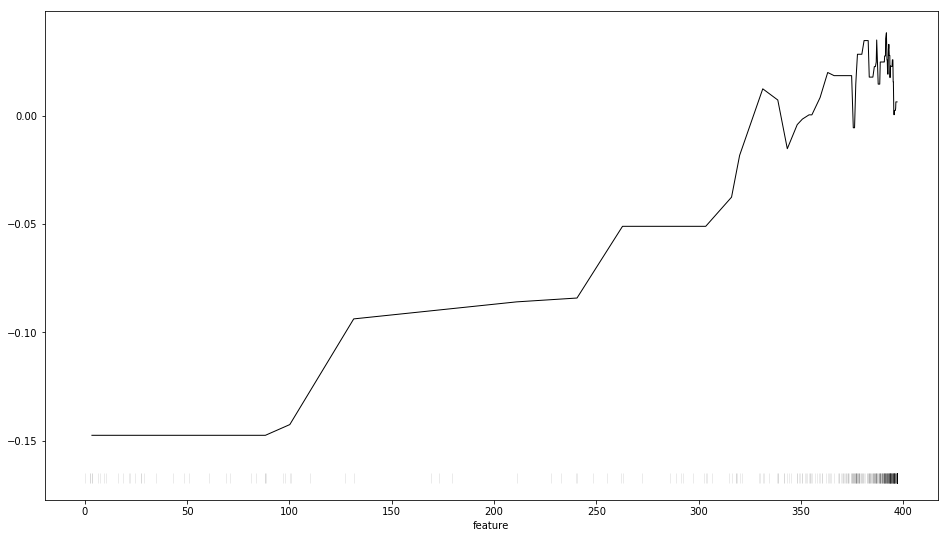

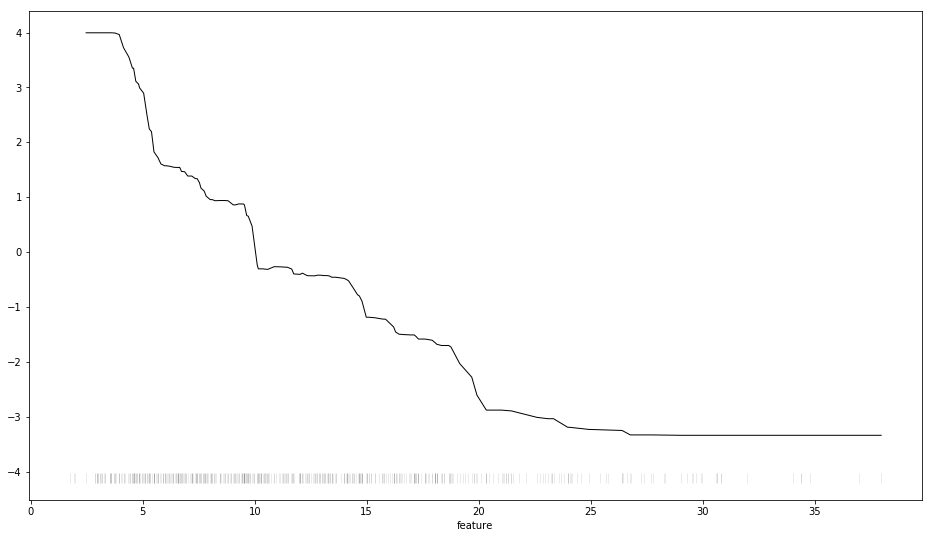

In [20]:
from accumulated_local_effects import ale_plot

for f, feature_name in enumerate(dataset.columns):
    feature_type = feature_type_mapping[feature_name]
    ale_df = ale_plot(model=model,
                      X=X,
                      feature_number=f, 
                      delta_split=4,
                      feature_type=feature_type)
    
    if feature_type == 'discrete':
        ale_df.plot(x='feature',
                    y='ALE',
                    figsize=(16, 9), 
                    legend=False, 
                    marker='o', 
                    linewidth=0.2, 
                    markersize=3, 
                    color='black')
        
    elif feature_type == 'continuous':
        ale_df.plot(x='feature',
                y='ALE',
                figsize=(16, 9), 
                legend=False, 
                linewidth=1, 
                color='black')
        
    ax = plt.gca()
    bottom, top = ax.get_ylim()
    indicator_height = 0.05 * (top - bottom)
    plt.plot(dataset[feature_name].values, 
            [bottom - indicator_height]*dataset.shape[0], 
            '|',
            markersize=10,
            color='k', 
            alpha=0.08)
    

## Shapley values

In [82]:
from shapley_values import get_shapley_values

In [83]:
explanation = get_shapley_values(model, X, X[2:3, :], mode='reg', n_jobs=-1)

In [84]:
explanation

Explanation(average_prediction=22.54082600378184, actual_prediction=array([35.75836083]), shapley_values=array([ 1.12952979e-01,  6.09949299e-03, -3.98816930e-02, -9.17415848e-04,
        2.44412911e-01,  5.44549882e+00, -5.44203700e-03, -8.84451586e-02,
       -1.70057899e-02,  2.59714022e-01,  1.11880330e-01,  3.19229188e-02,
        7.15674544e+00]))

In [126]:
explanation.average_prediction

22.54082600378184

In [143]:
explanation.actual_prediction

array([35.75836083])

(array([22., 23., 24., 25., 26., 27., 28., 29., 30., 31.]),
 <a list of 10 Text xticklabel objects>)

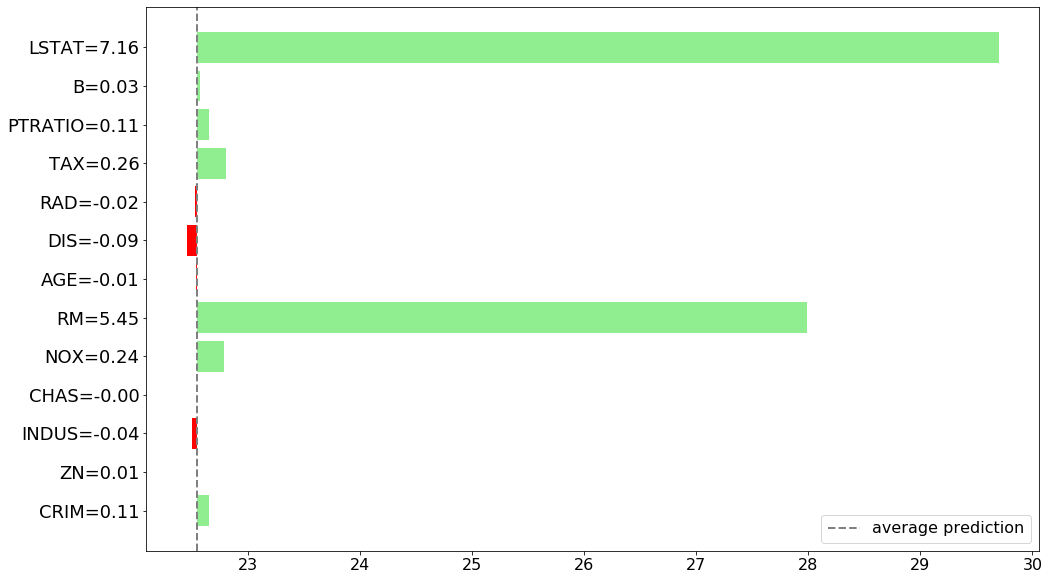

In [142]:
mask_neg = explanation.shapley_values < 0
mask_pos = explanation.shapley_values >= 0

plt.figure(figsize=(16, 10))

ticks = ["{}={:.2f}".format(pair[0], pair[1]) for pair in zip(dataset.columns, list(explanation.shapley_values))]
plt.barh(ticks, explanation.shapley_values, left=explanation.average_prediction)
plt.barh(np.array(ticks)[mask_pos], explanation.shapley_values[mask_pos], left=explanation.average_prediction, color='lightgreen')
plt.barh(np.array(ticks)[mask_neg], explanation.shapley_values[mask_neg], left=explanation.average_prediction, color='red')
plt.axvline(explanation.average_prediction, linewidth=2, linestyle='--', color='grey', label='average prediction')

plt.legend(fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)